In [ ]:
!pip install mapclassify #helper package
!pip install osmnx
!pip install rioxarray

import geopandas as gpd # import geopandas
import osmnx as ox # import osmnx
import folium as fm # import folium
import rioxarray as rxr #import rioxarray

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import shapely.geometry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.6 MB/s eta 0:00:00


In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
place = 'toronto, ontario, canada'
tag = {'amenity': ['hospital', 'clinic']}
toronto_hospital = gpd.read_file('https://raw.githubusercontent.com/MIE223-2024/course-datasets/refs/heads/main/toronto_hospital.geojson')
toronto_hospital.head()

,name,property_type,geometry
0,Scarborough Health Network - Centenary Hospital,hospital,POINT (-79.20481 43.78025)
1,Centre For Addiction and Mental Health - Queen...,hospital,POINT (-79.41864 43.643)
2,Sunnybrook Health Sciences Centre - Bayview Ca...,hospital,POINT (-79.37479 43.7227)
3,Toronto Western Hospital,hospital,POINT (-79.40548 43.65351)
4,St. Joseph's Health Centre,hospital,POINT (-79.45006 43.6403)


In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
!wget https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
!unzip lfsa000a16a_e.zip -d lfsa000a16a_e

toronto_FSA = gpd.read_file('lfsa000a16a_e')
# 'CFSAUID' start with m
toronto_FSA = toronto_FSA[toronto_FSA['CFSAUID'].str.startswith('M')]
toronto_FSA = toronto_FSA[['CFSAUID', 'geometry']]
toronto_FSA['property_type'] = 'FSA'
toronto_FSA.columns = ['name', 'geometry', 'property_type']
toronto_FSA.head()

--2025-03-30 23:54:45--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662579 (15M) [application/x-zip-compressed]
Saving to: ‘lfsa000a16a_e.zip’

lfsa000a16a_e.zip   100%[===================>]  14.94M  7.06MB/s    in 2.1s    

2025-03-30 23:54:48 (7.06 MB/s) - ‘lfsa000a16a_e.zip’ saved [15662579/15662579]

Archive:  lfsa000a16a_e.zip
  inflating: lfsa000a16a_e/lfsa000a16a_e.dbf  
  inflating: lfsa000a16a_e/lfsa000a16a_e.prj  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shp  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shx  
  inflating: lfsa000a16a_e/forward_sortation_area.html  
  inflating: lfsa000a16a_e/92-179-g2016001-eng.pdf  


,name,geometry,property_type
637,M9R,"POLYGON ((7209908.14 928259.897, 7209816.766 9...",FSA
638,M9V,"POLYGON ((7206682.694 937743.451, 7206631.563 ...",FSA
639,M9W,"POLYGON ((7210531.76 934710.503, 7210542.117 9...",FSA
701,M1P,"POLYGON ((7233594.731 942118.174, 7233584.157 ...",FSA
702,M1R,"MULTIPOLYGON (((7231166.76 939882.914, 7231356...",FSA


In [ ]:
### Your code here ###

print(toronto_hospital.crs)
print(toronto_FSA.crs)

toronto_FSA.to_crs(epsg=4326, inplace=True)

gdf_all = pd.concat([toronto_FSA, toronto_hospital], axis=0, ignore_index=True)
gdf_all.head(5)

EPSG:4326
PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",63.390675],PARAMETER["central_meridian",-91.8666666666667],PARAMETER["standard_parallel_1",49],PARAMETER["standard_parallel_2",77],PARAMETER["false_easting",6200000],PARAMETER["false_northing",3000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


,name,geometry,property_type
0,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA
1,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA
2,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA
3,M1P,"POLYGON ((-79.24704 43.75374, -79.2472 43.7536...",FSA
4,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA


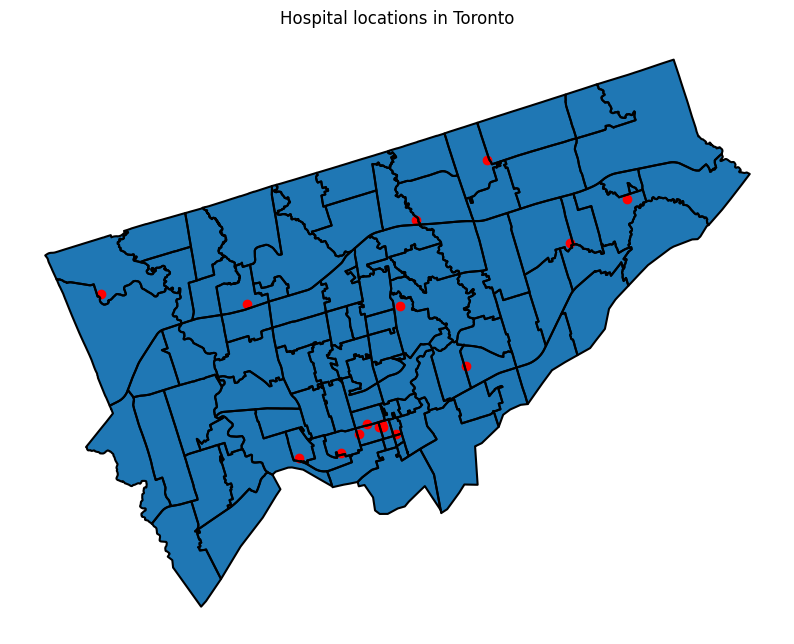

In [ ]:
### Your code here ###
# You do not need to color your shapes in this part of the question
#diplay the choropleth

gdf_all[gdf_all['property_type'] == 'FSA'].plot(figsize=(10, 10))
gdf_all[gdf_all['property_type'] == 'hospital'].plot(figsize=(10, 10), color='red', ax=plt.gca())

# plots boundary of map
gdf_all[gdf_all['property_type'] == 'FSA'].boundary.plot(figsize=(10, 10), color = 'black', ax=plt.gca())

plt.title('Hospital locations in Toronto')
plt.axis('off')
plt.show()

**Your Text Answer** There's a cluster of hospitals in the south, namely downtown. There seems to be a lack of hospitals to the west.

In [ ]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###

gdf_all['centroid'] = gdf_all['geometry'].apply(lambda geom: geom.centroid if geom.geom_type in ['Polygon', 'MultiPolygon'] else geom)

##your code end here ###

In [ ]:
# calculate the distance matrix between each FSA centriod and hospital
## Your code here ###

fsa_centroid = gdf_all[gdf_all['property_type'] == 'FSA'][['name', 'centroid']]
hospital_centroid = gdf_all[gdf_all['property_type'] == 'hospital'][['name', 'centroid']]

def get_distance_matrix(fsa_centroid, hospital_centroid) -> pd.DataFrame:
    distance_matrix = np.zeros((fsa_centroid.shape[0], hospital_centroid.shape[0]))
    for i in range(fsa_centroid.shape[0]):
        for j in range(hospital_centroid.shape[0]):
            distance_matrix[i, j] = fsa_centroid.iloc[i]['centroid'].distance(hospital_centroid.iloc[j]['centroid'])
    distance_matrix = pd.DataFrame(distance_matrix, index=fsa_centroid['name'].to_list(), columns=hospital_centroid['name'])
    return distance_matrix

distance_matrix = get_distance_matrix(fsa_centroid, hospital_centroid)
distance_matrix.head(5)

name,Scarborough Health Network - Centenary Hospital,Centre For Addiction and Mental Health - Queen Street Site,Sunnybrook Health Sciences Centre - Bayview Campus,Toronto Western Hospital,St. Joseph's Health Centre,Michael Garron Hospital,Etobicoke General Hospital,Humber River Hospital,Scarborough Health Network - General Campus,Scarborough Health Network - Birchmount Hospital,North York General Hospital,Toronto General Hospital,Hospital for Sick Children,Mount Sinai Hospital,Centre For Addiction and Mental Health - College Street Site,St. Michael's Hospital
M9R,0.365086,0.146369,0.186494,0.156309,0.117911,0.233066,0.057618,0.078006,0.317728,0.273428,0.211529,0.172316,0.173130,0.170388,0.161292,0.183388
M9V,0.391324,0.202029,0.220449,0.208868,0.176941,0.274522,0.013983,0.107479,0.346817,0.290978,0.233110,0.222667,0.223731,0.221119,0.212260,0.234141
M9W,0.385836,0.178507,0.209764,0.187347,0.151057,0.259992,0.023838,0.096522,0.339601,0.289709,0.229242,0.202582,0.203500,0.200794,0.191738,0.213871
M1P,0.067660,0.190490,0.111969,0.173655,0.217406,0.090713,0.329641,0.222007,0.022906,0.055718,0.092980,0.157066,0.157537,0.159487,0.165377,0.152953
M1R,0.097361,0.161511,0.082105,0.144695,0.187853,0.065660,0.301504,0.193196,0.049884,0.053526,0.068432,0.128541,0.129104,0.130923,0.136407,0.125230


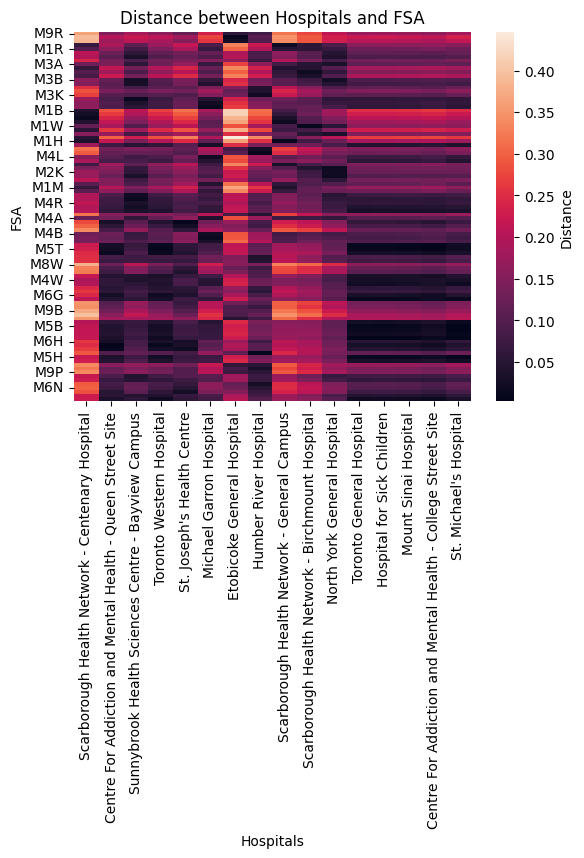

In [ ]:
warnings.filterwarnings('ignore')
import seaborn as sns
### you code here##
#plot the heatmap

sns.heatmap(distance_matrix, cbar_kws={'label': 'Distance'})
plt.title('Distance between Hospitals and FSA')
plt.xlabel('Hospitals')
plt.ylabel('FSA')
plt.show()

**Your Text Answer** Overall difficult to interpret. In terms of fairness of distribution of hospitals, finding the distance between each FSA code and their nearest hospital would make more sense and would be more legible.

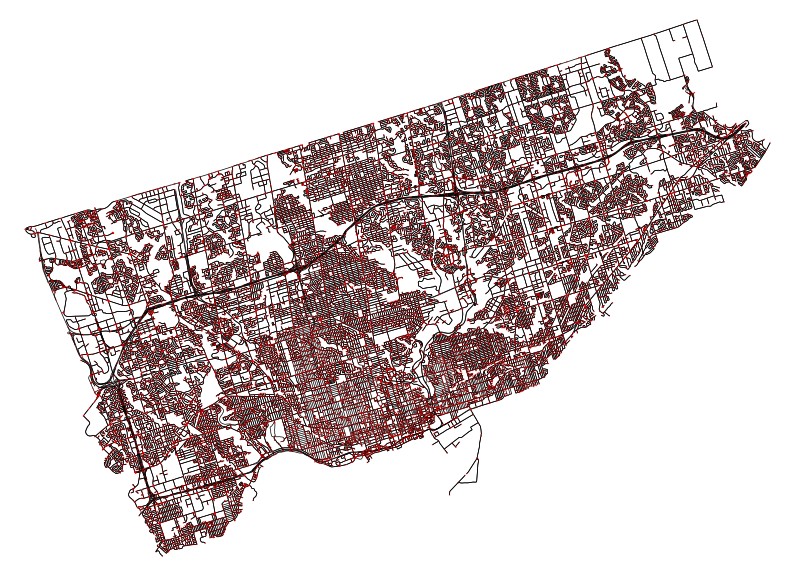

27390
73051


In [ ]:
## you code here ##

# the solution might take > 1 min to run

place = 'City of Toronto, Ontario, Canada'
street_map = ox.graph.graph_from_place(place, network_type='drive')

ox.plot_graph(street_map, figsize = (10, 10), bgcolor = 'w', node_size = 1, node_color = 'r', node_alpha = 0.5, edge_linewidth = 0.5, edge_color = 'k')
plt.show()

print(street_map.number_of_nodes())
print(street_map.number_of_edges())

 **your text answer** Theres 27390 nodes and 73051 edges

In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
distance_matrix_by_shortest_path = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/distance_matrix_by_shortest_path.csv', index_col=0)
# create a new pandas series to store the nearest distance
smallest_distance_by_shortest_path = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance_by_shortest_path.name = 'nearest_hospital'

# obtain all row that is a foward sortation area
toronto_FSA.to_crs(epsg=4326, inplace=True)
toronto_FSA['centroid'] = toronto_FSA['geometry'].apply(lambda x: x.centroid)
# merge the distance series with the FSA shape data
gdf_smallest_distance_by_shortest_path = toronto_FSA.merge(smallest_distance_by_shortest_path, left_on='name', right_index=True).rename(columns={0: 'nearest_hospital'})
gdf_smallest_distance_by_shortest_path.head()
# Since the given code reuse some code in previous questions, which can be accidentally manipulated in some cases.
# To make sure the given code generates the correct value for your assignment, we want you to run the given code and validate the output matches with our original output.
# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,geometry,property_type,centroid,nearest_hospital
637,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA,POINT (-79.55799 43.68778),6973.215
638,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA,POINT (-79.59433 43.74274),1854.019
639,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA,POINT (-79.58416 43.70983),2981.682
701,M1P,"POLYGON ((-79.24704 43.75374, -79.2472 43.7536...",FSA,POINT (-79.27 43.76213),2710.604
702,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA,POINT (-79.29717 43.74945),4471.884


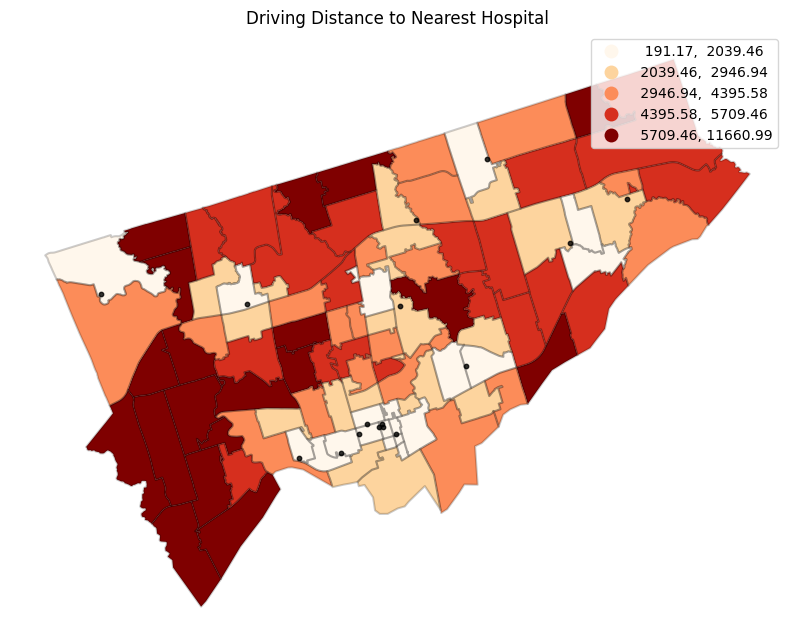

In [ ]:
## you code here ##

gdf_smallest_distance_by_shortest_path.plot(column='nearest_hospital', legend=True, scheme='quantiles', cmap='OrRd', figsize=(10, 10))

gdf_smallest_distance_by_shortest_path.boundary.plot(figsize=(10, 10), color = 'black',alpha=0.2, ax = plt.gca())

gdf_all[gdf_all['property_type'] == 'hospital'].plot(color='black', alpha=0.8, markersize=10, ax = plt.gca())

plt.title('Driving Distance to Nearest Hospital')
plt.axis("off")
plt.show()

**your text answer** Similar to conclusions made in Q1, there's an imbalane of hospitals between the south and areas around such as the west, high north, and certain parts in the east.

In [ ]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
census_data = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/2016_census.csv').iloc[:, 1:]
census_data.columns = ['name', 'median_income', 'population','visual_minority']
census_data['prec_visual_minority'] = census_data['visual_minority'] / census_data['population']
census_data = toronto_FSA.merge(census_data, on='name')
census_data = census_data[['name','prec_visual_minority','centroid']]
census_data.head()

# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,prec_visual_minority,centroid
0,M9R,0.544557,POINT (-79.55799 43.68778)
1,M9V,0.814882,POINT (-79.59433 43.74274)
2,M9W,0.689214,POINT (-79.58416 43.70983)
3,M1P,0.737640,POINT (-79.27 43.76213)
4,M1R,0.564003,POINT (-79.29717 43.74945)


In [ ]:
# empty folium map
nearest_hospital_map = fm.Map(location=[43.7, -79.4], zoom_start=12,
                                  scrollWheelZoom=False, tiles=None,
                                    control_scale=True)
# geo-json file with vector shape of FSA
FSA_json = gdf_smallest_distance_by_shortest_path[['name', 'geometry']].to_json()

## you code here ##
fm.TileLayer('openstreetmap').add_to(nearest_hospital_map)
quantile = gdf_smallest_distance_by_shortest_path['nearest_hospital'].quantile([0, 0.25, 0.5, 0.75, 1]).to_list()

fm.Choropleth(
    geo_data=FSA_json,
    name='Shortest Distance to Nearest Hospital',
    data=gdf_smallest_distance_by_shortest_path,
    columns=['name', 'nearest_hospital'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.7,
    bins=quantile,
    legend_name='Shortest Driving Distance to Nearest Hospital (km)'
).add_to(nearest_hospital_map)

circle_markers = fm.FeatureGroup(name="Visual Minority Circles")

for i, row in census_data.iterrows():
    radius = row['prec_visual_minority'] * 25
    fm.CircleMarker(
        location=[row['centroid'].y, row['centroid'].x],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(circle_markers)

circle_markers.add_to(nearest_hospital_map)
fm.LayerControl().add_to(nearest_hospital_map)
nearest_hospital_map

**your text answer** The map does not help to make substantial conclusions when it comes to visual minorities and hospitals. The outer edges of toronto all seem to have the same problem of being far from hospitals, and again the downtown area has no problem.